In [17]:
import pandas as pd  # For working with tables/data
import numpy as np   # For mathematical operations
import matplotlib.pyplot as plt  # For creating graphs
import seaborn as sns  # For beautiful visualizations

In [18]:
df = pd.read_csv('02_cleaned_data.csv')

print(f"✅ Data loaded: {df.shape[0]:,} samples, {df.shape[1]} features")
final_features = [col for col in df.columns if col not in ['is_attack', 'label2']]

print(f"✅ Features: {len(final_features)}")

✅ Data loaded: 685,671 samples, 42 features
✅ Features: 40


# STEP 4 : TRAINING

### 🧠 Model 1: Logistic Regression 

In [19]:
from sklearn.model_selection import train_test_split

X = df[final_features]
y = df['is_attack']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(X_train.shape, X_test.shape)


(548536, 40) (137135, 40)


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [21]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
log_reg = LogisticRegression(max_iter=5000)

# Train the model
log_reg.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=5000)

Accuracy: 0.9037
Precision: 0.9782
Recall: 0.7859
F1-Score: 0.8716


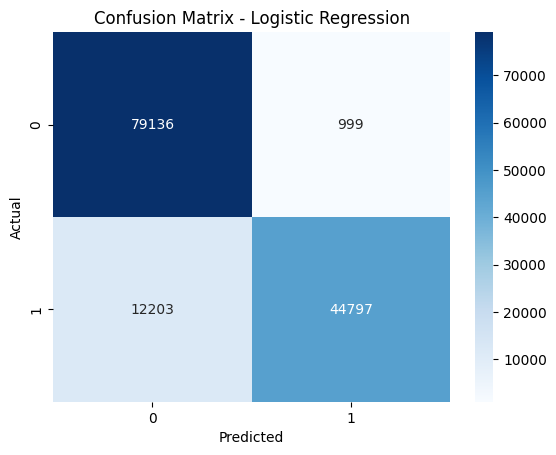

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predictions
y_pred = log_reg.predict(X_test_scaled)

# Evaluation metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}")

# Confusion matrix 
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### 🧠 Model 2: K-Nearest Neighbors (KNN)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

# Create and train KNN model
knn = KNeighborsClassifier(n_neighbors=7, weights='distance')
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

Accuracy: 0.9580
Precision: 0.9891
Recall: 0.9090
F1-Score: 0.9474


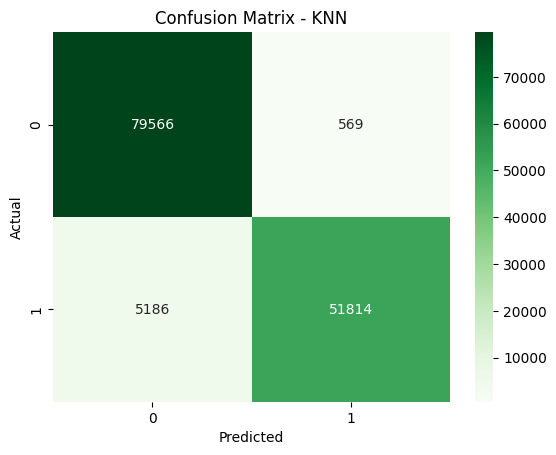

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate
acc = accuracy_score(y_test, y_pred_knn)
prec = precision_score(y_test, y_pred_knn, zero_division=0)
rec = recall_score(y_test, y_pred_knn, zero_division=0)
f1 = f1_score(y_test, y_pred_knn, zero_division=0)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#  Model 3: Decision Tree Classifier 

In [25]:
# Step 1: Import Required Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
# Step 2: Create and Train Decision Tree Model
# max_depth=10 limits tree depth to prevent overfitting
# random_state=42 ensures reproducibility

dt = DecisionTreeClassifier(random_state=42, max_depth=10,class_weight='balanced')
dt.fit(X_train_scaled, y_train)

print("✅ Decision Tree model trained successfully!")

✅ Decision Tree model trained successfully!


✅ Predictions made on 137135 test samples
DECISION TREE - PERFORMANCE METRICS
Accuracy:  0.9582
Precision: 0.9885
Recall:    0.9099
F1-Score:  0.9476


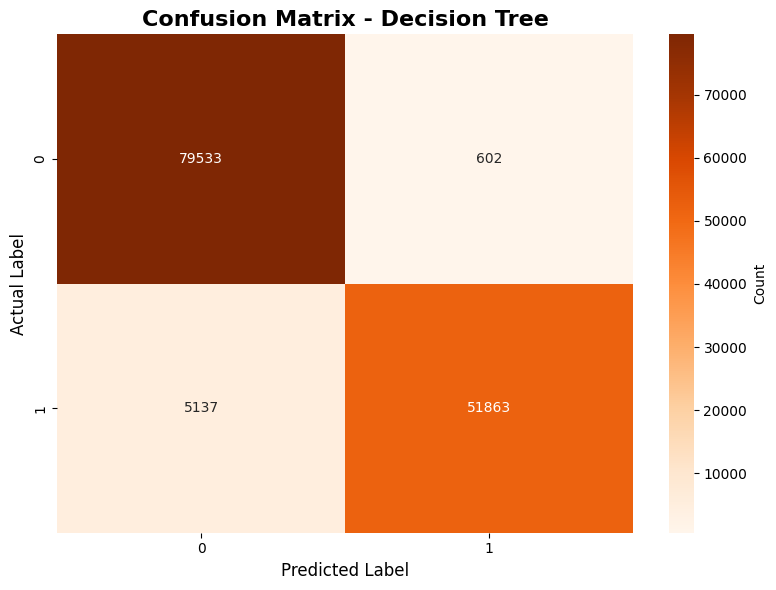


📊 Confusion Matrix Breakdown:
True Negatives (Normal correctly identified): 79533
False Positives (Normal flagged as Attack): 602
False Negatives (Attack missed): 5137
True Positives (Attack correctly identified): 51863


In [28]:
# Step 3: Make Predictions on Test Set
y_pred_dt = dt.predict(X_test_scaled)

print(f"✅ Predictions made on {len(y_pred_dt)} test samples")
# Step 4: Evaluate Model Performance
acc = accuracy_score(y_test, y_pred_dt)
prec = precision_score(y_test, y_pred_dt, zero_division=0)
rec = recall_score(y_test, y_pred_dt, zero_division=0)
f1 = f1_score(y_test, y_pred_dt, zero_division=0)

print("=" * 50)
print("DECISION TREE - PERFORMANCE METRICS")
print("=" * 50)
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-Score:  {f1:.4f}")
print("=" * 50)
# Confusion Matrix
# Step 5: Visualize Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Decision Tree', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('Actual Label', fontsize=12)
plt.tight_layout()
plt.show()

print(f"\n📊 Confusion Matrix Breakdown:")
print(f"True Negatives (Normal correctly identified): {cm[0][0]}")
print(f"False Positives (Normal flagged as Attack): {cm[0][1]}")
print(f"False Negatives (Attack missed): {cm[1][0]}")
print(f"True Positives (Attack correctly identified): {cm[1][1]}")

## Model 4 : Random Forest

In [29]:
# Step 1: Import Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [30]:
# Retrain Random Forest with class weights
# Make attack class even more important
# Retrain Random Forest with class weights
rf_weighted = RandomForestClassifier(
    n_estimators=300,
    max_depth=25,
   class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf_weighted.fit(X_train_scaled, y_train)
y_pred_weighted = rf_weighted.predict(X_test_scaled)

print("="*60)
print("RANDOM FOREST WITH CLASS WEIGHTS")
print("="*60)
print(f"Accuracy:  {accuracy_score(y_test, y_pred_weighted):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_weighted):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_weighted):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_weighted):.4f}")
print("="*60)

RANDOM FOREST WITH CLASS WEIGHTS
Accuracy:  0.9667
Precision: 0.9976
Recall:    0.9220
F1-Score:  0.9583


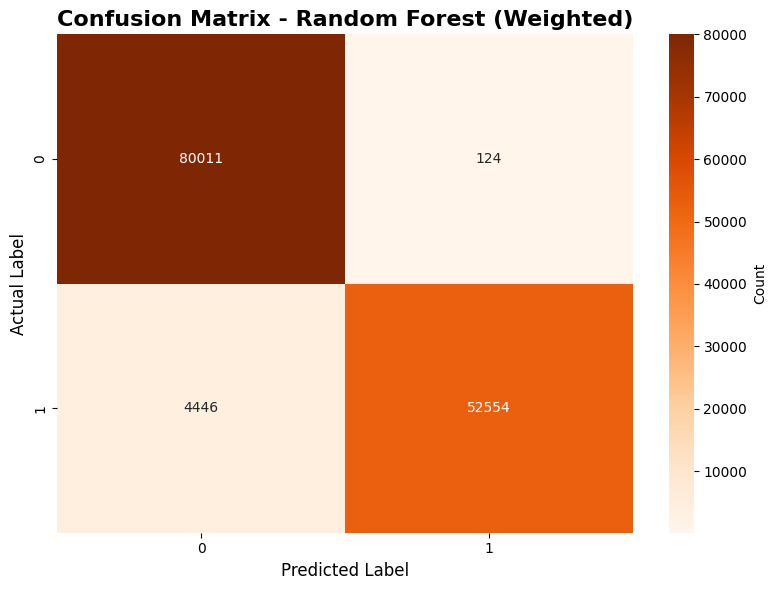


📊 Confusion Matrix Breakdown:
True Negatives (Normal correctly identified): 80011
False Positives (Normal flagged as Attack): 124
False Negatives (Attack missed): 4446
True Positives (Attack correctly identified): 52554


In [31]:
# Step 3: Visualize Confusion Matrix
cm = confusion_matrix(y_test, y_pred_weighted)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Random Forest (Weighted)', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('Actual Label', fontsize=12)
plt.tight_layout()
plt.show()

print(f"\n📊 Confusion Matrix Breakdown:")
print(f"True Negatives (Normal correctly identified): {cm[0][0]}")
print(f"False Positives (Normal flagged as Attack): {cm[0][1]}")
print(f"False Negatives (Attack missed): {cm[1][0]}")
print(f"True Positives (Attack correctly identified): {cm[1][1]}")